### Project 2 - Income Qualification (New)

## DESCRIPTION

Identify the level of income qualification needed for the families in Latin America

# Problem Statement Scenario:
Many social programs have a hard time making sure the right people are given enough aid. It’s tricky when a program focuses on the poorest segment of the population. This segment of population can’t provide the necessary income and expense records to prove that they qualify.

In Latin America, a popular method called Proxy Means Test (PMT) uses an algorithm to verify income qualification. With PMT, agencies use a model that considers a family’s observable household attributes like the material of their walls and ceiling or the assets found in their homes to classify them and predict their level of need. While this is an improvement, accuracy remains a problem as the region’s population grows and poverty declines.

The Inter-American Development Bank (IDB) believes that new methods beyond traditional econometrics, based on a dataset of Costa Rican household characteristics, might help improve PMT’s performance.

# Following actions should be performed:
* Identify the output variable.
* Understand the type of data.
* Check if there are any biases in your dataset.
* Check whether all members of the house have the same poverty level.
* Check if there is a house without a family head.
* Set the poverty level of the members and the head of the house same in a family.
* Count how many null values are existing in columns.
* Remove null value rows of the target variable.
* Predict the accuracy using random forest classifier.
* Check the accuracy using a random forest with cross-validation.



In [360]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.io as pio
import plotly.express as px

import mglearn

# Dataset
---
1. Load files
2. Exploratory Data Analysis (EDA)
3. Preprocess data
4. Extract features
4. Train/Test split

In [361]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
# Drop the "jobedu" column from the dataframe.
train.drop('idhogar', axis = 1, inplace = True)
test.drop('idhogar', axis = 1, inplace = True)



## EDA 
---
* Understand the type of data.
* Check if there are any biases in your dataset.

In [362]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9557 entries, 0 to 9556
Columns: 142 entries, Id to Target
dtypes: float64(8), int64(130), object(4)
memory usage: 10.4+ MB


Lets Understand the type of data.


In [363]:
#List the columns for different datatypes:
print('List of all Columns: ')
print(train.columns)
print('\n')
print('Integer Type: ')
Col_int = train.select_dtypes(np.int64).columns
print(Col_int)
print('\n')
print('Float Type: ')
Col_float = train.select_dtypes(np.float64).columns
print(Col_float)
print('\n')
print('Object Type: ')
Col_cat = train.select_dtypes(np.object).columns
print(Col_cat)
print('\n')
print('Count:')
print(train.dtypes.value_counts())


List of all Columns: 
Index(['Id', 'v2a1', 'hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q',
       'v18q1', 'r4h1',
       ...
       'SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 'SQBhogar_nin',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq', 'Target'],
      dtype='object', length=142)


Integer Type: 
Index(['hacdor', 'rooms', 'hacapo', 'v14a', 'refrig', 'v18q', 'r4h1', 'r4h2',
       'r4h3', 'r4m1',
       ...
       'area1', 'area2', 'age', 'SQBescolari', 'SQBage', 'SQBhogar_total',
       'SQBedjefe', 'SQBhogar_nin', 'agesq', 'Target'],
      dtype='object', length=130)


Float Type: 
Index(['v2a1', 'v18q1', 'rez_esc', 'meaneduc', 'overcrowding',
       'SQBovercrowding', 'SQBdependency', 'SQBmeaned'],
      dtype='object')


Object Type: 
Index(['Id', 'dependency', 'edjefe', 'edjefa'], dtype='object')


Count:
int64      130
float64      8
object       4
dtype: int64


In [364]:
# Let take a look at the Object Type

train.select_dtypes('object').head()

,Id,dependency,edjefe,edjefa
0,ID_279628684,no,10,no
1,ID_f29eb3ddd,8,12,no
2,ID_68de51c94,8,no,11
3,ID_d671db89c,yes,11,no
4,ID_d56d6f5f5,yes,11,no


Mapping varibles to thire approprite Data type


In [365]:
mapping = {"yes": 1, "no": 0}

for i in [train,test]:
    i['dependency'] = i['dependency'].replace(mapping).astype(np.float64)
    i['edjefe'] = i['edjefe'].replace(mapping).astype(np.float64)
    i['edjefa'] = i['edjefa'].replace(mapping).astype(np.float64)

## Checking  if there are any biases in your dataset.

In [366]:
contingency_tab=pd.crosstab(train['r4t3'],train['hogar_total'])
Observed_Values=contingency_tab.values

import scipy.stats

b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)

from scipy.stats import chi2

chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)
print('\n')
# Decission Rule
print('Decision And Conclusion:')
if chi_square_statistic>=critical_value:
 print("Reject H0,There is a relationship between 2 categorical variables")
else:
 print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:

 print("Reject H0,There is a relationship between 2 categorical variables")
else:
 print("Retain H0,There is no relationship between 2 categorical variables")


Degree of Freedom:- 1
chi-square statistic:- 17022.072400560897
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 17022.072400560897
critical_value: 3.841458820694124
p-value: 0.0


Decision And Conclusion:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [367]:
contingency_tab=pd.crosstab(train['tipovivi3'],train['v2a1'])
Observed_Values=contingency_tab.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

print('\n')
# Decission Rule
print('Decision And Conclusion:')

if chi_square_statistic>=critical_value:
 print("Reject H0,There is a relationship between 2 categorical variables")
else:
 print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
 print("Reject H0,There is a relationship between 2 categorical variables")

else:
 print("Retain H0,There is no relationship between 2 categorical variables")

Degree of Freedom:- 1
chi-square statistic:- 54.04781105990782
critical_value: 3.841458820694124
p-value: 1.9562129693895258e-13
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 54.04781105990782
critical_value: 3.841458820694124
p-value: 1.9562129693895258e-13


Decision And Conclusion:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


In [368]:
contingency_tab=pd.crosstab(train['v18q'],train['v18q1'])
Observed_Values=contingency_tab.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

print('\n')
# Decission Rule
print('Decision And Conclusion:')

if chi_square_statistic>=critical_value:
 print("Reject H0,There is a relationship between 2 categorical variables")
else:
 print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
 print("Reject H0,There is a relationship between 2 categorical variables")
else:
 print("Retain H0 There is no relationship between 2 categorical variables")




Degree of Freedom:- 0
chi-square statistic:- 0.0
critical_value: nan
p-value: nan
Significance level:  0.05
Degree of Freedom:  0
chi-square statistic: 0.0
critical_value: nan
p-value: nan


Decision And Conclusion:
Retain H0,There is no relationship between 2 categorical variables
Retain H0 There is no relationship between 2 categorical variables


In [369]:
contingency_tab=pd.crosstab(train['male'],train['female'])
Observed_Values=contingency_tab.values
import scipy.stats
b=scipy.stats.chi2_contingency(contingency_tab)
Expected_Values = b[3]
no_of_rows=len(contingency_tab.iloc[0:2,0])
no_of_columns=len(contingency_tab.iloc[0,0:2])
df=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",df)
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)])
chi_square_statistic=chi_square[0]+chi_square[1]
print("chi-square statistic:-",chi_square_statistic)
alpha=0.05
critical_value=chi2.ppf(q=1-alpha,df=df)
print('critical_value:',critical_value)
p_value=1-chi2.cdf(x=chi_square_statistic,df=df)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',df)
print('chi-square statistic:',chi_square_statistic)
print('critical_value:',critical_value)
print('p-value:',p_value)

print('\n')
# Decission Rule
print('Decision And Conclusion:')

if chi_square_statistic>=critical_value:
 print("Reject H0,There is a relationship between 2 categorical variables")
else:
 print("Retain H0,There is no relationship between 2 categorical variables")

if p_value<=alpha:
 print("Reject H0,There is a relationship between 2 categorical variables")
else:
 print("Retain H0 There is no relationship between 2 categorical variables")


Degree of Freedom:- 1
chi-square statistic:- 9557.0
critical_value: 3.841458820694124
p-value: 0.0
Significance level:  0.05
Degree of Freedom:  1
chi-square statistic: 9557.0
critical_value: 3.841458820694124
p-value: 0.0


Decision And Conclusion:
Reject H0,There is a relationship between 2 categorical variables
Reject H0,There is a relationship between 2 categorical variables


## Solution 
* Therefore,variables  ('tipovivi3','v2a1'), ('r4t3','hogar_total'),('male','female')   have relationship between them. For good result we can use any one of them.
 Conclusion : Therefore, there is bias in our dataset


## Check whether all members of the house have the same poverty level

In [370]:
Target=train.groupby('Target')['Id'].agg('count')
x1=['extreme poverty','moderate poverty','vulnerable households ','non vulnerable households ']
trace1=go.Bar(x=x1,y=Target)
layout=go.Layout(title="Population",yaxis=dict(title='Number of people'))
fig=go.Figure(data=[trace1],layout=layout)
py.iplot(fig)

## Checking if there is a house without a family head.
---
* parentesco1, =1 if household head
* edjefe, # years of education of male head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0
* edjefa, # years of education of female head of household, based on the interaction of escolari (years of education), head of household and gender, yes=1 and no=0

In [371]:
print(train.parentesco1.value_counts())

print('\n')
pd.crosstab(train['edjefa'],train['edjefe'])


0    6584
1    2973
Name: parentesco1, dtype: int64




edjefe,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
edjefa,,,,,,,,,,,,,,,,,,,,,
0.0,435,123,194,307,137,222,1845,234,257,486,...,113,103,208,285,134,202,19,14,7,43
1.0,69,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2.0,84,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.0,152,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.0,136,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5.0,176,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.0,947,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7.0,179,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8.0,217,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Interpretation : Above cross tab shows 0 male head and 0 female head which implies that there are 435 families with no family head.


## Seting the poverty level of the members and the head of the house same in a family.
----
Now for people below poverty level can be people paying less rent and don't own a house. and it also depends on whether a house is in urban area or
rural area

In [372]:
Poverty_level=train[train['v2a1'] !=0]


In [373]:
poverty_level=Poverty_level.groupby('area1')['v2a1'].apply(np.median)

def povert(x):
    if x<8000:
      return('Below poverty level')

    elif x>140000:
       return('Above poverty level')
    elif x<140000:
       return('Below poverty level: Ur-ban ; Above poverty level : Rural ')


c=Poverty_level['v2a1'].apply(povert) 

In [374]:

pd.crosstab(c,Poverty_level['area1'])


area1,0,1
v2a1,,
Above poverty level,139,1103
Below poverty level: Ur-ban ; Above poverty level : Rural,306,1081


Therefore;
* There are total of 1242 people above poverty level independent of area whether rural or Urban
* Remaining 1111 people level depends on their area
Rural :
Above poverty level= 445
Urban :
Above poverty level =1103
Below poverty level=1081


#  Now lets look at v2a1   : Monthly rent payment and Columns related to Monthly rent payment
* tipovivi1, =1 own and fully paid house
* tipovivi2, "=1 own, paying in installments"
* tipovivi3, =1 rented
* tipovivi4, =1 precarious
* tipovivi5, "=1 other(assigned, borrowed)"

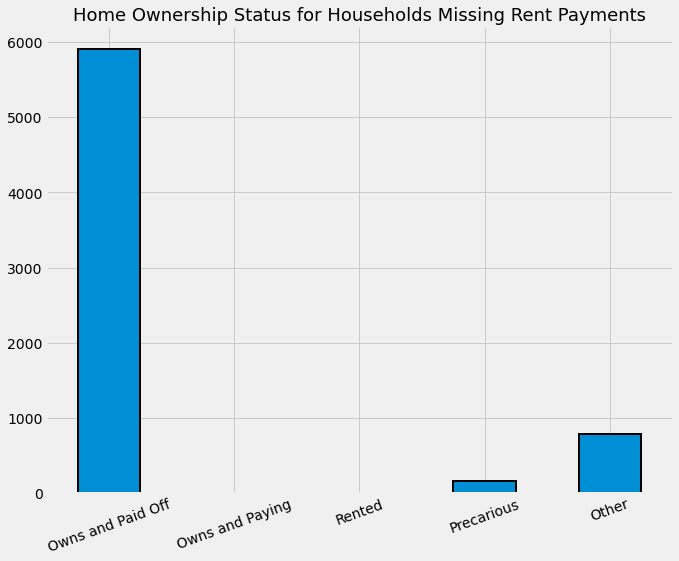

In [375]:
pd.crosstab(c,Poverty_level['area1'])
print('\n')

# Variables indicating home ownership
own_variables = [x for x in train if x.startswith('tipo')]
# Plot of the home ownership variables for home missing rent payments
train.loc[train['v2a1'].isnull(), own_variables].sum().plot.bar(figsize = (10, 8),
  edgecolor = 'k', linewidth = 2);
plt.xticks([0, 1, 2, 3, 4],
 ['Owns and Paid Off', 'Owns and Paying', 'Rented', 'Precarious', 'Other'],
 rotation = 20)
plt.style.use("fivethirtyeight")
plt.title('Home Ownership Status for Households Missing Rent Payments', size = 18);

## Preparing Data 
Count how many null values are existing in columns.

---
  * Clearn Data
Remove null value rows of the target variable.


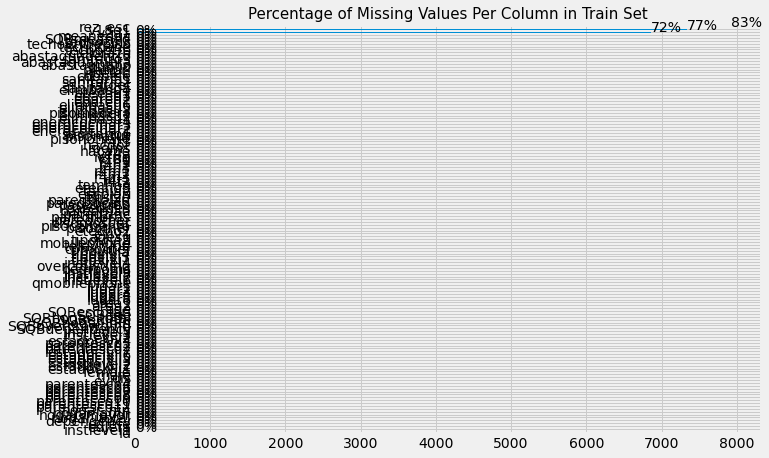

In [376]:
# Check if there any missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (10, 7))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

So let take a better look at the first three

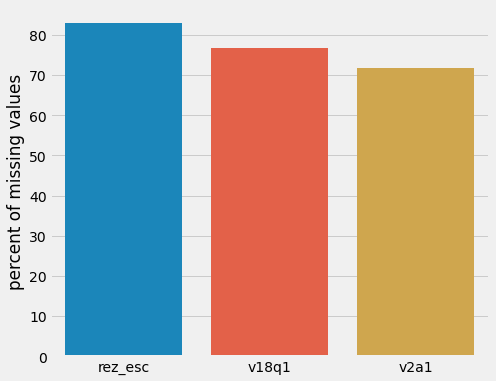

In [377]:
missing=pd.DataFrame(100*train.isnull().sum()/len(train),columns=["percent of missing values"]).sort_values(ascending=False,by
                                                                                                       ="percent of missing values")
plt.figure(figsize=(7,6))
plt.style.use("fivethirtyeight")
sns.barplot(x=missing.index[:3],y=missing["percent of missing values"][:3])
plt.show()

In [378]:
train['v2a1']=train['v2a1'].fillna(0)
train['v18q1']=train['v18q1'].fillna(0)
train['rez_esc']=train['rez_esc'].fillna(0)

test['v2a1']=test['v2a1'].fillna(0)
test['v18q1']=test['v18q1'].fillna(0)
test['rez_esc']=test['rez_esc'].fillna(0)

---
* It is always true that the squared features which are highly correlated with its corresponding base features
* Also, the male completely coorelates with female, area1 completely coorelates with area2, they are either-or relationships

In [379]:
Redundant = ['SQBescolari', 'SQBage', 'SQBhogar_total', 'SQBedjefe', 
        'SQBhogar_nin', 'SQBovercrowding', 'SQBdependency', 'SQBmeaned', 'agesq','female','area2','r4t3']

Train = train.drop(columns = Redundant)
Test = test.drop(columns = Redundant)

In [380]:

All_data = pd.concat((Train, Test)).reset_index(drop=True)



In [381]:
# Fill in missing values

for col in All_data.columns:
    All_data[col] = All_data[col].fillna(All_data[col].mode()[0])
  
# Confirm that there aren't any missing values
All_data.isna().sum()

Id        0
v2a1      0
hacdor    0
rooms     0
hacapo    0
         ..
lugar5    0
lugar6    0
area1     0
age       0
Target    0
Length: 130, dtype: int64

## Model
---
* Predict the accuracy using random forest classifier.
* Check the accuracy using a random forest with cross-validation.

In [382]:
from sklearn.model_selection import train_test_split

main_cols = All_data.drop(['Id','Target'], axis=1)
# Select main columns to be used in training
X = main_cols.fillna(main_cols.mean())
y = All_data.Target


In [383]:


# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,stratify=y, random_state=42)

# Model selection
from sklearn.ensemble import RandomForestClassifier
# Train model
Forest = RandomForestClassifier(n_estimators=5, random_state=2)
Forest.fit(X_train, y_train)

# Make predictions
y_pred = Forest.predict(X_test)
y_pred


array([4., 4., 4., ..., 4., 4., 4.])

# Predicting the accuracy using random forest classifier.


In [384]:
accuracy = Forest.score(X,y)
print("Accuracy on training set = ", accuracy * 100, "%")



Accuracy on training set =  98.36590548588873 %


# Check the accuracy using a random forest with cross-validation.

In [385]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics import make_scorer

scoring = {'prec_macro': 'precision_macro',
            'rec_macro': make_scorer(recall_score, average='macro')}
scores = cross_validate(Forest, X, y, scoring=scoring,
                         cv=5, return_train_score=True)
sorted(scores.keys())
['fit_time', 'score_time', 'test_prec_macro', 'test_rec_macro',
 'train_prec_macro', 'train_rec_macro']
  
scores['train_rec_macro']

array([0.9740189 , 0.96893293, 0.97904753, 0.98079792, 0.97587902])

To get a better sense of what is going on inside the Random Forest Classifier model, visualize how your model uses the different features and which features have greater effect.

In [386]:
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score,classification_report


print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


0.9531960737371319
[[ 118    7    2   62]
 [   5  253    6  135]
 [   0    8  175  119]
 [   8   24   15 7417]]
              precision    recall  f1-score   support

         1.0       0.90      0.62      0.74       189
         2.0       0.87      0.63      0.73       399
         3.0       0.88      0.58      0.70       302
         4.0       0.96      0.99      0.98      7464

    accuracy                           0.95      8354
   macro avg       0.90      0.71      0.79      8354
weighted avg       0.95      0.95      0.95      8354



In [387]:
Forest.fit(X,y)
labels = list(X)
feature_importances = pd.DataFrame({'Feature': labels, 'importance': Forest.feature_importances_})
feature_importances=feature_importances[feature_importances.importance>0.015]
feature_importances.head()


,Feature,importance
0,v2a1,0.017823
2,rooms,0.025885
9,r4h2,0.020328
10,r4h3,0.020929
12,r4m2,0.015683


Text(0.5, 0, 'Importance')

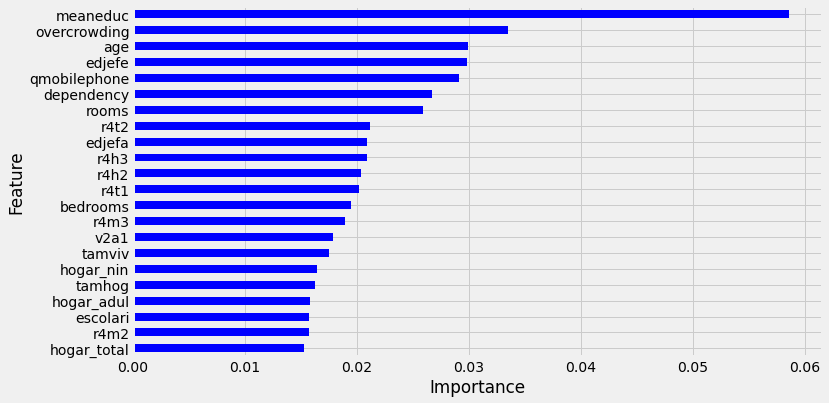

In [388]:
feature_importances.sort_values(by=['importance'], ascending=True, inplace=True)
feature_importances['positive'] = feature_importances['importance'] > 0
feature_importances.set_index('Feature',inplace=True)
feature_importances.head()
feature_importances.importance.plot(kind='barh', figsize=(11, 6),color = feature_importances.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')
